In [2]:
from inspect_ai.log import read_eval_log
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def load_scores(path):
    # return nhops, answer_same (aka score), original_answer, truncated_answer, target
    logs = read_eval_log(path)
    scores = []
    for sample in logs.samples:
        metadata = sample.metadata
        score_key = list(sample.scores.keys())[0]
        score = sample.scores[score_key]
        if score.metadata is not None:
            scores.append((
                metadata.get('num_hops', -1), 
                score.value, 
                score.metadata.get('original_answer'),
                score.metadata.get('truncated_answer'),
                score.metadata.get('target'),
                score.metadata.get('truncation_fraction', 0.0),
                score.metadata.get('num_steps', 0),
                score.metadata.get('steps_kept', 0)
            ))
        else:
            scores.append((metadata.get('nhops', 0), score.value, None, None, None, None, None, None))

    df = pd.DataFrame(scores, columns=[
        'nhops', 
        'answers_differ', 
        'original_answer', 
        'truncated_answer',
        'target',
        'truncation_fraction',
        'num_steps',
        'steps_kept'
    ])

    df['answers_same'] = df['answers_differ'].apply(lambda x: 1 if x == 0 else 0)

    return df

In [3]:
logs_dir = '../logs/truncated_faithfulness_k250_qwen7'
all_scores = []
for log in os.listdir(logs_dir):
    if log.endswith('.eval'):
        all_scores.append(load_scores(os.path.join(logs_dir, log)))

all_scores = pd.concat(all_scores)

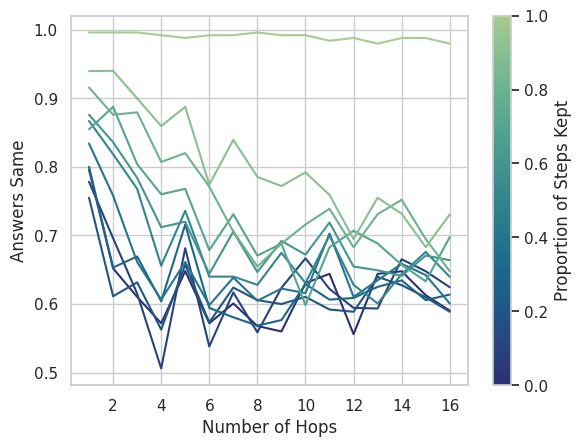

In [29]:
# Plot
sns.set_theme(style="whitegrid")

# Create a continuous color palette
palette = sns.color_palette("crest_r", as_cmap=True)
# Plot with continuous color mapping
p = sns.lineplot(
    x="Number of Hops", 
    y="Answers Same", 
    hue="Proportion of Steps Kept", 
    data=all_scores.rename(columns={'nhops': 'Number of Hops', 'answers_same': 'Answers Same', 'truncation_fraction': 'Proportion of Steps Kept'}), 
    errorbar=None,
    legend=False,
    palette=palette
)
# Create a colorbar with integer ticks on the x-axis
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=palette), label="Proportion of Steps Kept", ax=p)
# Set the x-axis ticks to be integers
p.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

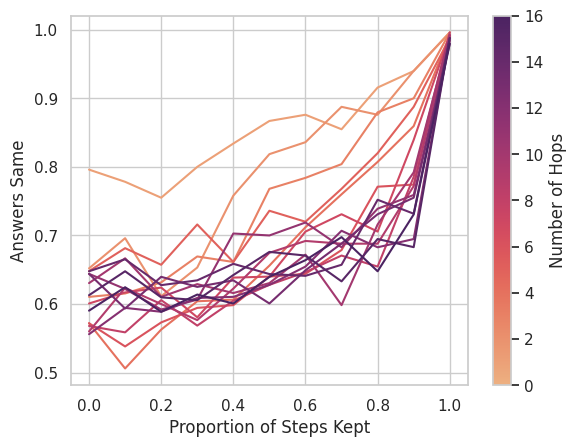

In [28]:
# Fix duplicate labels by creating a copy with reset index
plot_data = all_scores.reset_index(drop=True)
palette = sns.color_palette("flare", as_cmap=True)

# Plot with continuous color mapping
p = sns.lineplot(
    x="Proportion of Steps Kept", 
    y="Answers Same", 
    hue="Number of Hops", 
    data=plot_data.rename(columns={'nhops': 'Number of Hops', 'answers_same': 'Answers Same', 'truncation_fraction': 'Proportion of Steps Kept'}), 
    errorbar=None,
    legend=False,
    palette=palette
)
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(plot_data['nhops'].min(), plot_data['nhops'].max()), cmap=palette), label="Number of Hops", ax=p)

In [5]:
logs_dir = 'unfaithful_logs_qwen7_4'
all_scores = []
for log in os.listdir(logs_dir):
    if log.endswith('.eval'):
        all_scores.append(load_scores(os.path.join(logs_dir, log)))

all_scores = pd.concat(all_scores)

<Axes: xlabel='nhops', ylabel='answer_same'>

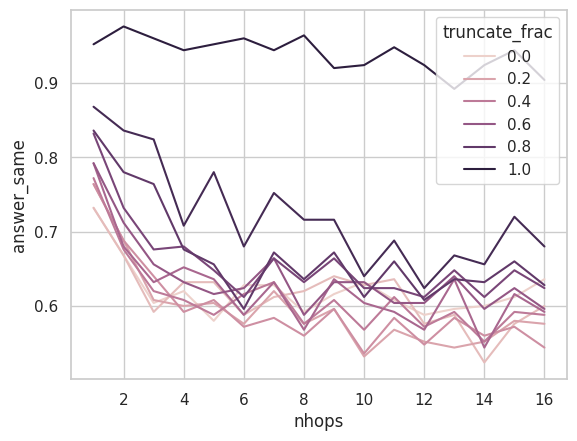

In [11]:
# Plot
sns.set_theme(style="whitegrid")

sns.lineplot(x="nhops", y="answer_same", hue="truncate_frac", data=all_scores, errorbar=None)

<Axes: xlabel='truncate_frac', ylabel='answer_same'>

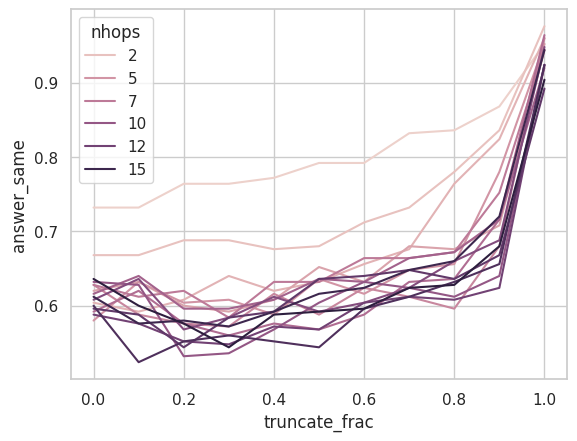

In [12]:
# Plot
sns.lineplot(x="truncate_frac", y="answer_same", hue="nhops", data=all_scores, errorbar=None)

In [3]:
logs_dir = 'unfaithful_logs_qwen7_5'
all_scores = []
for log in os.listdir(logs_dir):
    if log.endswith('.eval'):
        all_scores.append(load_scores(os.path.join(logs_dir, log)))

all_scores = pd.concat(all_scores)

<Axes: xlabel='nhops', ylabel='answer_same'>

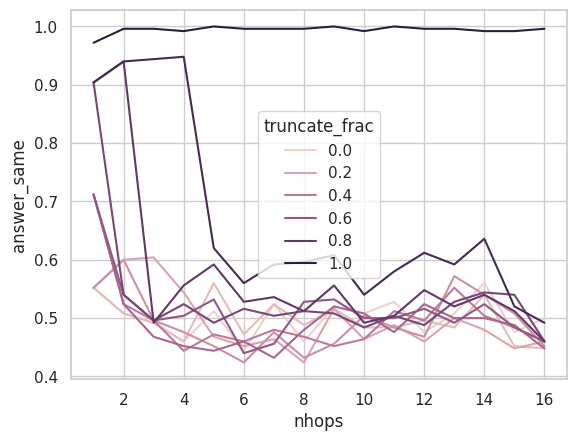

In [4]:
# Plot
sns.set_theme(style="whitegrid")

sns.lineplot(x="nhops", y="answer_same", hue="truncate_frac", data=all_scores, errorbar=None)

<Axes: xlabel='truncate_frac', ylabel='answer_same'>

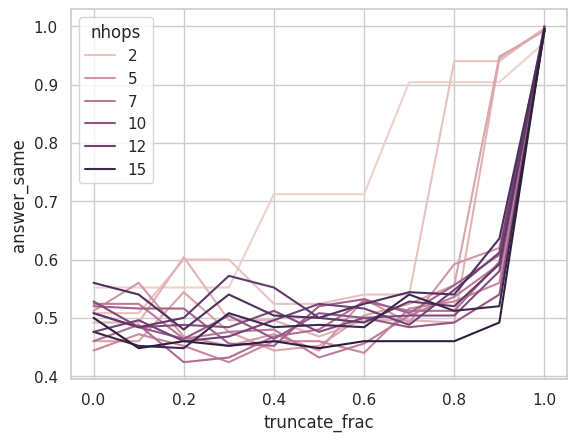

In [5]:
# Plot
sns.lineplot(x="truncate_frac", y="answer_same", hue="nhops", data=all_scores, errorbar=None)